# Working with Data

This example shows how to work with the data of a loaded test system, including parameters and variables.

In [1]:
import andes
from andes.utils.paths import get_case

andes.config_logger()

To show all the rows and columns, change the pandas configuration with

In [2]:
import pandas as pd

pd.options.display.max_columns = None
pd.options.display.max_rows = None

Let's load the Kundur's system.

## Load System from an ANDES XLSX File

The ANDES xlsx file is the best supported format. Other formats can be converted to the xlsx format.

See the link below for more about format conversion.
https://github.com/cuihantao/andes/blob/master/README.md#format-converter

As previously shown, test cases can be loaded with ``andes.run()``:

In [3]:
ss = andes.run(get_case('kundur/kundur_full.xlsx'),
               default_config=True)  # one can remove `default_config=True` to use custom config file

Working directory: "/home/hacui/repos/andes/examples"
> Loaded generated Python code in "/home/hacui/.andes/pycode".
Parsing input file "/home/hacui/repos/andes/andes/cases/kundur/kundur_full.xlsx"...
Input file parsed in 0.0732 seconds.
System internal structure set up in 0.0199 seconds.
-> System connectivity check results:
  No islanded bus detected.
  System is interconnected.
  Each island has a slack bus correctly defined and enabled.

-> Power flow calculation
   Sparse solver: KLU
 Solution method: NR method
Power flow initialized in 0.0027 seconds.
0: |F(x)| = 14.9282832
1: |F(x)| = 3.608627841
2: |F(x)| = 0.1701107882
3: |F(x)| = 0.002038626956
4: |F(x)| = 3.745103977e-07
Converged in 5 iterations in 0.0046 seconds.
Report saved to "kundur_full_out.txt" in 0.0007 seconds.


-> Single process finished in 0.2108 seconds.


Alternatively, one can load a test case _without setting up_ using `andes.load(..., setup=False)`. Note that `setup=False` option.
It is useful to apply parameter changes to an existing test case.

In [4]:
ss = andes.load(get_case('kundur/kundur_full.xlsx'), 
                default_config=True, 
                setup=False)

Working directory: "/home/hacui/repos/andes/examples"
> Reloaded generated Python code of module "pycode".
Parsing input file "/home/hacui/repos/andes/andes/cases/kundur/kundur_full.xlsx"...
Input file parsed in 0.0261 seconds.


For example, we can toggle the connectivity status `u` of `Line_3` to `0` using

In [5]:
ss.Line.alter('u', 'Line_3', 0)

When done, remember to set up the system before running calculation routines:

In [6]:
ss.setup()

ss.PFlow.run()

System internal structure set up in 0.0383 seconds.
-> System connectivity check results:
  No islanded bus detected.
  System is interconnected.
  Each island has a slack bus correctly defined and enabled.

-> Power flow calculation
   Sparse solver: KLU
 Solution method: NR method
Power flow initialized in 0.0019 seconds.
0: |F(x)| = 14.9282832
1: |F(x)| = 3.579044433
2: |F(x)| = 0.119268955
3: |F(x)| = 0.03278820195
4: |F(x)| = 2.880943096e-05
5: |F(x)| = 3.93747257e-11
Converged in 6 iterations in 0.0054 seconds.
Report saved to "kundur_full_out.txt" in 0.0003 seconds.


True

After setting up the system, adding or removing devices are not yet allowed.

## Load System from PSS/E RAW and DYR Files

ANDES supports loading systems from PSS/E RAW and DYR files.

The PSS/E v32 raw format is best supported.

Note that this feature is experimental. We try out best to support this format, but the compatibility is not guaranteed.

In [7]:
raw_path = get_case('kundur/kundur.raw')
dyr_path = get_case('kundur/kundur_full.dyr')

The raw file is passed to the positional argument, whereas the dyr file is passed to `addfile`.

In [8]:
ss = andes.run(raw_path, addfile=dyr_path, default_config=True)

Working directory: "/home/hacui/repos/andes/examples"
> Reloaded generated Python code of module "pycode".
Parsing input file "/home/hacui/repos/andes/andes/cases/kundur/kundur.raw"...
  MODIFIED KUNDUR'S TWO-AREA TEST SYSTEM, DISTRIBUTED WITH ANDES
  SEE THE BOOK "POWER SYSTEM STABILITY AND CONTROL" FOR ORIGINAL DATA
Input file parsed in 0.0022 seconds.
Parsing additional file "/home/hacui/repos/andes/andes/cases/kundur/kundur_full.dyr"...
Addfile parsed in 0.0580 seconds.
System internal structure set up in 0.0186 seconds.
-> System connectivity check results:
  No islanded bus detected.
  System is interconnected.
  Each island has a slack bus correctly defined and enabled.

-> Power flow calculation
   Sparse solver: KLU
 Solution method: NR method
Power flow initialized in 0.0018 seconds.
0: |F(x)| = 3.175850023
1: |F(x)| = 3.176155228e-08
Converged in 2 iterations in 0.0020 seconds.
Report saved to "kundur_out.txt" in 0.0003 seconds.


-> Single process finished in 0.1284 seconds.


### Attributes for storing values

Parameters are stored as attributes of the model. For example, `ss.GENROU.M`, the machine starting time constant (`2H`), is stored in `ss.GENROU.M`.

In [9]:
ss.GENROU.M

NumParam: GENROU.M, v=[117.   117.   111.15 111.15], vin=[13.   13.   12.35 12.35]

It is an instance of `NumParam`, which contains fields `v` for the values after converting to system-base per unit values.

In [10]:
ss.GENROU.M.v

array([117.  , 117.  , 111.15, 111.15])

And field `vin` is for the original input data.

In [11]:
ss.GENROU.M.vin

array([13.  , 13.  , 12.35, 12.35])

### Tabulated view

ANDES provides tabulated **view** of model parameters by using DataFrame. Each model object has an attribute called `cache` for caching the parameter dataframes.

The original parameters from the input file are stored in `cache.df_in` of the model object. For `GENROU`, do

In [12]:
ss.GENROU.cache.df_in

,idx,u,name,bus,gen,coi,coi2,Sn,Vn,fn,D,M,ra,xl,xd1,kp,kw,S10,S12,gammap,gammaq,xd,xq,xd2,xq1,xq2,Td10,Td20,Tq10,Tq20
uid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,GENROU_1,1.0,GENROU_1,1,1,None,None,900.0,20.0,60.0,0.0,13.00,0.0,0.06,0.3,0.0,0.0,0.0,0.0,1.0,1.0,1.8,1.7,0.25,0.55,0.25,8.0,0.03,0.4,0.05
1,GENROU_2,1.0,GENROU_2,2,2,None,None,900.0,20.0,60.0,0.0,13.00,0.0,0.06,0.3,0.0,0.0,0.0,0.0,1.0,1.0,1.8,1.7,0.25,0.55,0.25,8.0,0.03,0.4,0.05
2,GENROU_3,1.0,GENROU_3,3,3,None,None,900.0,20.0,60.0,0.0,12.35,0.0,0.06,0.3,0.0,0.0,0.0,0.0,1.0,1.0,1.8,1.7,0.25,0.55,0.25,8.0,0.03,0.4,0.05
3,GENROU_4,1.0,GENROU_4,4,4,None,None,900.0,20.0,60.0,0.0,12.35,0.0,0.06,0.3,0.0,0.0,0.0,0.0,1.0,1.0,1.8,1.7,0.25,0.55,0.25,8.0,0.03,0.4,0.05


Parameters will be **converted** to per-unit in the system base after loading. This process have been done if `andes.run` is used for loading the data file.

To inspect the converted parameters, check the `cache.df` parameter.

In [13]:
ss.GENROU.cache.df

,idx,u,name,bus,gen,coi,coi2,Sn,Vn,fn,D,M,ra,xl,xd1,kp,kw,S10,S12,gammap,gammaq,xd,xq,xd2,xq1,xq2,Td10,Td20,Tq10,Tq20
uid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,GENROU_1,1.0,GENROU_1,1,1,None,None,900.0,20.0,60.0,0.0,117.00,0.0,0.006667,0.033333,0.0,0.0,0.0,0.0,1.0,1.0,0.2,0.188889,0.027778,0.061111,0.027778,8.0,0.03,0.4,0.05
1,GENROU_2,1.0,GENROU_2,2,2,None,None,900.0,20.0,60.0,0.0,117.00,0.0,0.006667,0.033333,0.0,0.0,0.0,0.0,1.0,1.0,0.2,0.188889,0.027778,0.061111,0.027778,8.0,0.03,0.4,0.05
2,GENROU_3,1.0,GENROU_3,3,3,None,None,900.0,20.0,60.0,0.0,111.15,0.0,0.006667,0.033333,0.0,0.0,0.0,0.0,1.0,1.0,0.2,0.188889,0.027778,0.061111,0.027778,8.0,0.03,0.4,0.05
3,GENROU_4,1.0,GENROU_4,4,4,None,None,900.0,20.0,60.0,0.0,111.15,0.0,0.006667,0.033333,0.0,0.0,0.0,0.0,1.0,1.0,0.2,0.188889,0.027778,0.061111,0.027778,8.0,0.03,0.4,0.05


One will notice the converted parameters such as `M`, `xl`, and all other impedances.

**It is very important to notice that `cache.df` and `cache.df_in` are both views. Altering data in these views will NOT alter the underlying parameter values.**

To alter values, see the example below.

### Altering parameters

Parameters can be altered by calling the `alter` method on a model instance. 

We first look up the original value through `get`. 

Either `v` or `vin` can be passed to argument `attr` to retrieve the converted or the original data. Here we are retrieving the original input data. If `attr` is not provided, `get` returns the value after per-unit conversion, which is the value used for calculation, by default. 

In [14]:
ss.GENROU.get("M", "GENROU_1", attr='vin')

13.0

To change the `M` of `GENROU_1` to `10`, do

In [15]:
ss.GENROU.alter("M", "GENROU_1", 10)

The value set through `alter` is always the data before per-unit conversion - just like it should have been in an input file. ANDES will perform the conversion and set `vin` and `v` correctly.

Parameters altered through `Model.alter()` can be saved as a new system using

In [16]:
andes.io.xlsx.write(ss, 'new_system.xlsx', overwrite=True)

xlsx file written to "new_system.xlsx"


True

### In-place update

`alter()` can be used to change the value of `ConstService` to modify the
equation that depend on such `ConstService`. For example, the distributed PV
model `PVD1` implements a `ConstService` called `pref0` to store the initial
value of the power reference. An equation associated with variable `Pref`
enforces that `0 = Pref - pref0`.

If one needs to modify `Pref`, it has to be done through modifying `pref0`.
Modifying `Pref` directly will not take any effect since the variable will be
overwritten by the solution of equations. 

To update `pref0` for a `PVD1` device with `idx = "PVD_1"`, one can do

`ss.PVD1.alter('pref0', 'PVD_1', 0.005)`

or, using keyword arguments in any order, 

`ss.PVD1.alter(src='pref0', idx='PVD_1', value=0.005)`

If `PVD_1` is the first (i.e., 0-th in the Python indexing) in the idx list, this modification is equivalent to setting

`ss.PVD1.pref0.v[0] = 0.005`.

Since index `0` is given, the array `ss.PVD1.pref0.v` is updated in-place.

When one needs to modify the `pref0` of all `PVD1` devices to 0.005, one can do

`ss.PVD1.alter('pref0', ss.PVD1.idx.v, 0.005)`

This is equivalent to 

`ss.PVD1.pref0.v[:] = 0.005`

Note the `[:]` in the above line. This is a slice operation so that the
assignment happens in-place.

One must never do out-of-place assignment, i.e.,

`ss.PVD1.pref0.v = 0.005` 

or 

`ss.PVD1.pref0.v = 0.005 * np.ones_line(ss.PVD1.pref0.v)`

because the assignment will point `ss.PVD1.pref0.v` to a new array. Internally,
ANDES reuses the memory for all arrays, meaning that their addresses are assumed
to be constant. If one modifies `ss.PVD1.pref0.v` out of place, the previous
memory will no longer be accessible through `ss.PVD1.pref0.v`.

On the safe side, one should modify variables using `alter()` or, at least,
always use in-place assignment to internal arrays.

### Refreshing the view

As mentioned, `cache.df` and `cache.df_in` are *cached* views and will not be automatically updated for inspection.

This is generally not an issue if one performs the simulation after altering data. However, if one needs to inspect the data again, `cache.refresh()` needs to be called manually.


In [17]:
ss.GENROU.cache.refresh()

In [18]:
ss.GENROU.cache.df_in

,idx,u,name,bus,gen,coi,coi2,Sn,Vn,fn,D,M,ra,xl,xd1,kp,kw,S10,S12,gammap,gammaq,xd,xq,xd2,xq1,xq2,Td10,Td20,Tq10,Tq20
uid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,GENROU_1,1.0,GENROU_1,1,1,None,None,900.0,20.0,60.0,0.0,10.00,0.0,0.06,0.3,0.0,0.0,0.0,0.0,1.0,1.0,1.8,1.7,0.25,0.55,0.25,8.0,0.03,0.4,0.05
1,GENROU_2,1.0,GENROU_2,2,2,None,None,900.0,20.0,60.0,0.0,13.00,0.0,0.06,0.3,0.0,0.0,0.0,0.0,1.0,1.0,1.8,1.7,0.25,0.55,0.25,8.0,0.03,0.4,0.05
2,GENROU_3,1.0,GENROU_3,3,3,None,None,900.0,20.0,60.0,0.0,12.35,0.0,0.06,0.3,0.0,0.0,0.0,0.0,1.0,1.0,1.8,1.7,0.25,0.55,0.25,8.0,0.03,0.4,0.05
3,GENROU_4,1.0,GENROU_4,4,4,None,None,900.0,20.0,60.0,0.0,12.35,0.0,0.06,0.3,0.0,0.0,0.0,0.0,1.0,1.0,1.8,1.7,0.25,0.55,0.25,8.0,0.03,0.4,0.05


Alternatively, one can call the `as_df()` function to build a new dataframe *without overwriting* the cache:

In [19]:
ss.GENROU.as_df()

,idx,u,name,bus,gen,coi,coi2,Sn,Vn,fn,D,M,ra,xl,xd1,kp,kw,S10,S12,gammap,gammaq,xd,xq,xd2,xq1,xq2,Td10,Td20,Tq10,Tq20
uid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,GENROU_1,1.0,GENROU_1,1,1,None,None,900.0,20.0,60.0,0.0,90.00,0.0,0.006667,0.033333,0.0,0.0,0.0,0.0,1.0,1.0,0.2,0.188889,0.027778,0.061111,0.027778,8.0,0.03,0.4,0.05
1,GENROU_2,1.0,GENROU_2,2,2,None,None,900.0,20.0,60.0,0.0,117.00,0.0,0.006667,0.033333,0.0,0.0,0.0,0.0,1.0,1.0,0.2,0.188889,0.027778,0.061111,0.027778,8.0,0.03,0.4,0.05
2,GENROU_3,1.0,GENROU_3,3,3,None,None,900.0,20.0,60.0,0.0,111.15,0.0,0.006667,0.033333,0.0,0.0,0.0,0.0,1.0,1.0,0.2,0.188889,0.027778,0.061111,0.027778,8.0,0.03,0.4,0.05
3,GENROU_4,1.0,GENROU_4,4,4,None,None,900.0,20.0,60.0,0.0,111.15,0.0,0.006667,0.033333,0.0,0.0,0.0,0.0,1.0,1.0,0.2,0.188889,0.027778,0.061111,0.027778,8.0,0.03,0.4,0.05


## Variables

### Snapshots

One might also want to check the variable values in a similar way to that for a parameter. Certainly, a variable has a `v` attribute which stores values. 

**It is important to note that `v` only holds the values at the last program state.** Such program state could be the solution of power flow, the initialization of time-domain simulation, or the end of a simulation disturbances. 

Since we have only ran power flow for ``ss``, ``ss.Bus.v.v`` are the voltage magnitude solutions, where the first `v` is for "voltage", and the second `v` is the first `v`'s value attribute.

In [20]:
ss.Bus.v.v

array([1.        , 1.        , 1.        , 1.        , 0.98337472,
       0.96908585, 0.9562181 , 0.95400018, 0.96856366, 0.98377143])

Variables hold more than values. They have an attribute `a` for the addresses indexing into the corresponding type of array.

There are two system-level arrays, `ss.dae.x` and `ss.dae.y` for the right-hand-side of the differential and algebraic equations, respectively. 

In [21]:
type(ss.Bus.v)

andes.core.var.Algeb

`ss.Bus.v` is an algebraic variable, thus `ss.Bus.v.a` holds the indices into ``ss.dae.g``.

In [22]:
ss.dae.y[ss.Bus.v.a]

array([1.        , 1.        , 1.        , 1.        , 0.98337472,
       0.96908585, 0.9562181 , 0.95400018, 0.96856366, 0.98377143])

We can see that these two values are the same.

### Time series

After a time-domain simulation, the time series of the variables can be retrieved through `ss.dae.ts`. Let's first run a simulation.

In [23]:
ss.TDS.run()


-> Time Domain Simulation Summary:
Sparse Solver: KLU
Simulation time: 0.0-20.0 s.
Fixed step size: h=33.33 ms. Shrink if not converged.
Initialization for dynamics completed in 0.0180 seconds.
Initialization was successful.


<Toggler Toggler_1>: Line.Line_8 status changed to 0 at t=2.0 sec.              
100%|#########################################| 100/100 [00:00<00:00, 172.98%/s]

Simulation completed in 0.5784 seconds.
Outputs to "kundur_out.lst" and "kundur_out.npz".
Outputs written in 0.0170 seconds.


True

In [24]:
ss.dae.ts

`ss.dae.ts` has four commonly used attributes: `t` for time stamps, `xy` for variables (differential and then algebraic), `z` for discontinuous states, and `df` for the dataframe of all.

- Each point in `ss.dae.ts.t` correspond to a row in `ss.dae.ts.xy`.
- Each column in `ss.dae.ts.xy` correspond to a variable, whose name can be located in `ss.dae.xy_name`, for all timestamps.
- `z` is not stored by default unless one enables it before simulation by setting `ss.TDS.config.store_z = 1`. 
- `df` is not built by default but can be manually triggered after simulation by calling `ss.dae.ts.unpack(df=True)`

The following are some statistics of the shapes of arrays:

In [25]:
ss.dae.ts.t.shape

(603,)

In [26]:
ss.dae.ts.xy.shape  # x-axis is for time stamps, and y-axis is for variables

(603, 204)

In [27]:
len(ss.dae.xy_name)

204

### Extracting Variable Data

Let's extract the data for rotor speed (variable `omega`) of `GENROU` generators.
The first step to extract variable data is to determine the type of the variable: differential or algebraic.
One can print the variable to see the type:

In [28]:
ss.GENROU.omega

State: GENROU.omega, a=[4 5 6 7], v=[1.00165687 1.00166417 1.00182915 1.00184744], e=[-0.00251535 -0.00375723  0.00131868  0.00182826]

The output shows that `omega` is a state (differential variable), which should be looked up in `ss.dae.x`. For algebraic variables such as `ss.Bus.v`, they should be looked up in `ss.dae.y`.

Therefore, all `omega` variables can be extracted as follows:

In [29]:
omega = ss.dae.ts.x[:, ss.GENROU.omega.a]

where the `:` in the first axis will access such data for all time stamps, and
`ss.GENROU.omega.a` stores the addresses  of all `omega` into `ss.dae.x`.

To access all bus voltages (algebraic variable `v`) of the generators, one can use:

In [30]:
ss.dae.ts.y[:, ss.GENROU.v.a]

array([[1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        ],
       [1.        , 1.        , 1.        , 1.        ],
       ...,
       [1.00240968, 1.00148908, 0.99526693, 1.00007159],
       [1.00249935, 1.00159007, 0.99515528, 0.99997846],
       [1.00259067, 1.0016924 , 0.99504062, 0.999883  ]])

These data correspond to the timestamps stored in `ss.dae.ts.t`. One can process such data as necessary. 

To show verify the extracted data, we plot them with `ss.TDS.plt.plot_data`.

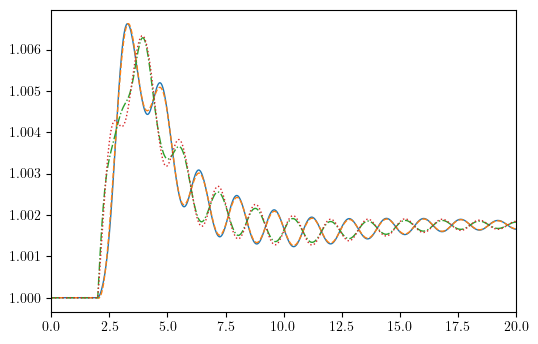

(<Figure size 600x400 with 1 Axes>, <AxesSubplot:>)

In [31]:
ss.TDS.plt.plot_data(ss.dae.ts.t, omega )

## Altering Fault duration

``Alter`` can be used for updating any model parameter. We show another example
of updating the duration of a fault. Using the `ieee14_fault.xlsx` test case, we have

In [32]:
ss = andes.run(get_case("ieee14/ieee14_fault.xlsx"))

Working directory: "/home/hacui/repos/andes/examples"
> Loaded config from file "/home/hacui/.andes/andes.rc"
> Reloaded generated Python code of module "pycode".
Parsing input file "/home/hacui/repos/andes/andes/cases/ieee14/ieee14_fault.xlsx"...
Input file parsed in 0.0344 seconds.
System internal structure set up in 0.0301 seconds.
-> System connectivity check results:
  No islanded bus detected.
  System is interconnected.
  Each island has a slack bus correctly defined and enabled.

-> Power flow calculation
   Sparse solver: UMFPACK
 Solution method: NR method
Numba compilation initiated with caching.
Power flow initialized in 0.1322 seconds.
0: |F(x)| = 0.5605182134
1: |F(x)| = 0.006202200332
2: |F(x)| = 5.819382825e-06
3: |F(x)| = 6.957087684e-12
Converged in 4 iterations in 0.0039 seconds.
Report saved to "ieee14_fault_out.txt" in 0.0006 seconds.


-> Single process finished in 0.3048 seconds.


Again, if you need to add devices, you should use ``ss = andes.load(..,
setup=False)`` and ``ss.setup()`` instead of ``andes.run()``.

List the existing ``Fault`` devices:

In [33]:
ss.Fault.as_df()

,idx,u,name,bus,tf,tc,xf,rf
uid,,,,,,,,
0,1,1.0,Fault_1,9,1.0,1.1,0.0001,0.0


One fault on Bus 9 is applied at t=1.0 sec and cleared at t=1.1 sec. Suppose
that we want to clear the fault at t = 1.05 sec, we can do

In [34]:
ss.Fault.alter('tc', 1, 1.05)  # arguments are `src`, `idx`, `value`

where `tc` is the parameter to alter, `1` is the idx of the Fault to find, and
`1.05` is the new value. Inspect the Fault devices to see the updated value.
The simulation for the new system can be performed next.

In [35]:
ss.Fault.as_df()

,idx,u,name,bus,tf,tc,xf,rf
uid,,,,,,,,
0,1,1.0,Fault_1,9,1.0,1.05,0.0001,0.0


## Cleanup

In [36]:
!andes misc -C

"/home/hacui/repos/andes/examples/kundur_out.lst" removed.
"/home/hacui/repos/andes/examples/kundur_out.txt" removed.
"/home/hacui/repos/andes/examples/kundur_full_out.txt" removed.
"/home/hacui/repos/andes/examples/kundur_out.npz" removed.
"/home/hacui/repos/andes/examples/ieee14_fault_out.txt" removed.


In [37]:
!rm new_system.xlsx